## **Example Class 1**

In [2]:
#Modules Required
import random
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sb

### Function to generate dataset

In [5]:
def generate_input_data():
    max_integer = int(input("Enter the max integer 'x' for the array: "))
    number_arrays = int(input("Enter the number of arrays to generate: "))
    array_size = 1000
    input_data = []
    for i in range(0, number_arrays):
        temp = []
        for j in range(0, array_size):
            temp.append(random.randint(1,max_integer))
        input_data.append(temp)
        array_size *= 10
        print("Array "+ str(i+1)+" generated")
       
    #Sort input_data by the size of the subarrays
    input_data.sort(key=len)
    #Print information about arrays - sanity check
    print("Number of Arrays Generated: ", len(input_data))
    for k in range(0, len(input_data)):
        print(f"Array {k+1} : {len(input_data[k])}")
    return input_data

### Insertion sort function

In [6]:
def insertion_sort(array):
    global comparisons
    for i in range(len(array)) :
        key = i
        for l in (range (i-1,-1,-1)) :
            if (array[key] < array[l]) :
                comparisons += 1
                temp = array[key]
                array[key] = array[l]
                array[l] = temp
                key = l

### Mergesort + insertion sort

In [7]:
def hybrid_sort(array, limiting_factor):
    global comparisons
    if (len(array) <= limiting_factor):
        #Trigger Insertion Sort
        insertion_sort(array)
        return array
    else:
        #Use Merge Sort
        x = len(array)
        mid = math.ceil(x / 2)
        array1 = array[:mid]
        array2 = array[mid:]
        array1 = hybrid_sort(array1, limiting_factor)
        array2 = hybrid_sort(array2, limiting_factor)
        temparray = []  
        x = 0
        y = 0
        len1 = len(array1)
        len2 = len(array2)
        while (x < len1 and y < len2):
            if (array1[x] <= array2[y]):
                comparisons += 1
                temparray.append(array1[x])
                x += 1
            else:
                temparray.append(array2[y])
                comparisons += 1
                y += 1
        while (x < len1):
            temparray.append(array1[x])
            x += 1
        while (y < len2):
            temparray.append(array2[y])
            y += 1
        return temparray

### Generate the dataset

In [3]:
global comparisons 
compArr = [ [0]*5 for k in range(6)] # 2d arrray to store number of comparisons (6 rows 5 columns) 

In [8]:
array = []
array = generate_input_data() # 2d array to store unsorted integers

Array 1 generated
Array 2 generated
Array 3 generated
Array 4 generated
Array 5 generated
Number of Arrays Generated:  5
Array 1 : 1000
Array 2 : 10000
Array 3 : 100000
Array 4 : 1000000
Array 5 : 10000000


### Run hybrid sort on different sized datasets with S=10

In [67]:
index = 0
threshold = int(input("Enter the size of the threshold: "))
for i in array:
    comparisons = 0
    start = time.perf_counter()
    hybrid_sort(i, threshold)
    end = time.perf_counter()
    print(f"Array Size {len(i)} | Threshold Size {threshold} | Comparisons: {comparisons} | Time Taken: {end-start} seconds")
    compArr[0][index] = comparisons 
    index+=1

Array Size 1000 | Threshold Size 10 | Comparisons: 8470 | Time Taken: 0.009975099999792292 seconds
Array Size 10000 | Threshold Size 10 | Comparisons: 120142 | Time Taken: 0.13177879999966535 seconds
Array Size 100000 | Threshold Size 10 | Comparisons: 1498385 | Time Taken: 1.730545999998867 seconds
Array Size 1000000 | Threshold Size 10 | Comparisons: 18420599 | Time Taken: 19.752201099998274 seconds
Array Size 10000000 | Threshold Size 10 | Comparisons: 219436087 | Time Taken: 120.99151679999886 seconds


### Run hybrid sort on dataset with N=1,000,000 and various values of S

In [69]:
S = [5, 10, 50, 100, 250] # List of different values of S(threshold size)

for i in range(0, 5):
    j = 0
    for threshold in S:
        comparisons = 0
        start = time.perf_counter()
        hybrid_sort(array[i], threshold) # Using the j-th unsorted array with 10^(j+3) values
        end = time.perf_counter()
        print(f"Array Size {len(array[i])} | Threshold Size {threshold} | Comparisons: {comparisons} | Time Taken: {end-start} seconds")
        compArr[i+1][j] = comparisons
        j+=1

Array Size 1000 | Threshold Size 5 | Comparisons: 8275 | Time Taken: 0.01977410000108648 seconds
Array Size 1000 | Threshold Size 10 | Comparisons: 8470 | Time Taken: 0.016366199999538367 seconds
Array Size 1000 | Threshold Size 50 | Comparisons: 12231 | Time Taken: 0.025330899999971734 seconds
Array Size 1000 | Threshold Size 100 | Comparisons: 18718 | Time Taken: 0.03368239999872458 seconds
Array Size 1000 | Threshold Size 250 | Comparisons: 63193 | Time Taken: 0.07325909999963187 seconds
Array Size 10000 | Threshold Size 5 | Comparisons: 116180 | Time Taken: 0.1493573000007018 seconds
Array Size 10000 | Threshold Size 10 | Comparisons: 120142 | Time Taken: 0.12991599999986647 seconds
Array Size 10000 | Threshold Size 50 | Comparisons: 176162 | Time Taken: 0.1929677999996784 seconds
Array Size 10000 | Threshold Size 100 | Comparisons: 263064 | Time Taken: 0.25854030000118655 seconds
Array Size 10000 | Threshold Size 250 | Comparisons: 447852 | Time Taken: 0.43558370000027935 seconds


### Table & graph for fixed S (10)

In [74]:
graph1 = pd.DataFrame(compArr[0], [1000,10000,100000,1000000,10000000])
graph1.reset_index(inplace=True)
graph1.rename({'index': 'Size', 0: 'No. of comparisions'}, axis=1, inplace=True)
graph1

,Size,No. of comparisions
0,1000,8470
1,10000,120142
2,100000,1498385
3,1000000,18420599
4,10000000,219436087


<AxesSubplot:xlabel='Size', ylabel='No. of comparisions'>

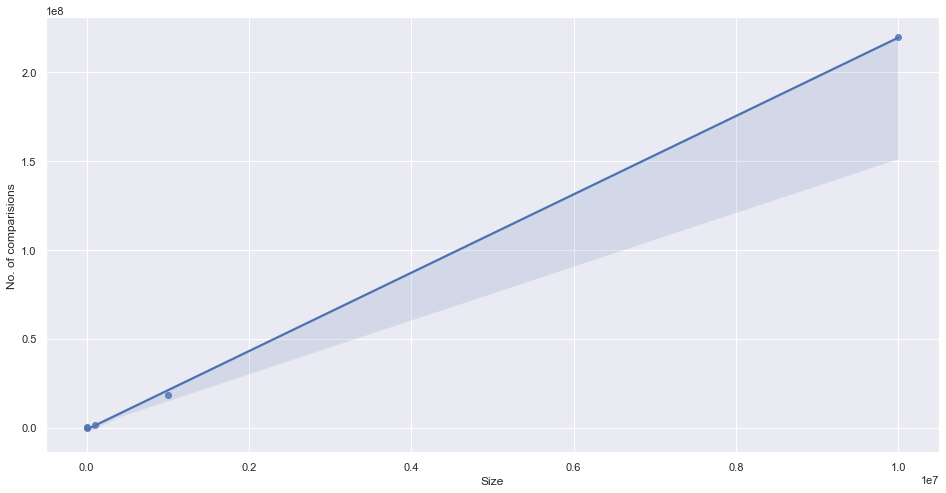

In [75]:
sb.set_theme()

f = plt.figure(figsize=(16, 8))
sb.regplot(x=graph1["Size"], y=graph1["No. of comparisions"])

### Table & graph for fixed N (1000)

In [77]:
graph2 = pd.DataFrame(compArr[1], S)
graph2.reset_index(inplace=True)
graph2.rename({'index': 'S', 0: 'No. of comparisions'}, axis=1, inplace=True)
graph2


,S,No. of comparisions
0,5,8275
1,10,8470
2,50,12231
3,100,18718
4,250,63193


<AxesSubplot:xlabel='S', ylabel='No. of comparisions'>

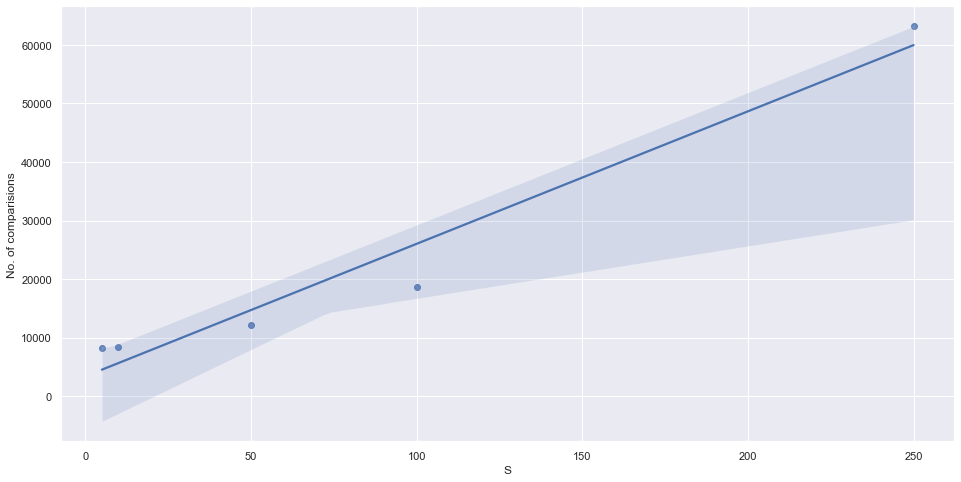

In [78]:
f = plt.figure(figsize=(16, 8))
sb.regplot(x=graph2["S"], y=graph2["No. of comparisions"])

### Table & graph for fixed N (10,000)

In [80]:
graph3 = pd.DataFrame(compArr[2], S)
graph3.reset_index(inplace=True)
graph3.rename({'index': 'S', 0: 'No. of comparisions'}, axis=1, inplace=True)
graph3


,S,No. of comparisions
0,5,116180
1,10,120142
2,50,176162
3,100,263064
4,250,447852


<AxesSubplot:xlabel='S', ylabel='No. of comparisions'>

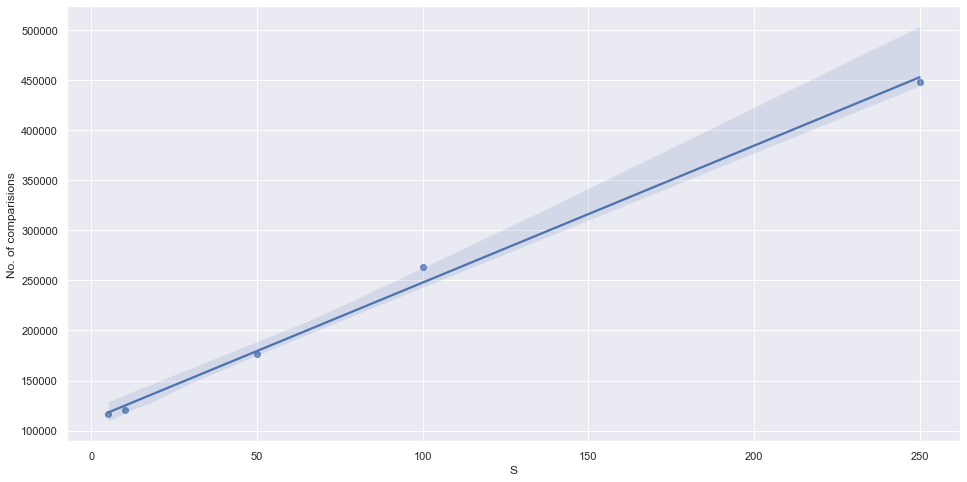

In [84]:
f = plt.figure(figsize=(16, 8))
sb.regplot(x=graph3["S"], y=graph3["No. of comparisions"])

### Table & graph for fixed N (100,000)

In [86]:
graph4 = pd.DataFrame(compArr[3], S)
graph4.reset_index(inplace=True)
graph4.rename({'index': 'S', 0: 'No. of comparisions'}, axis=1, inplace=True)
graph4

,S,No. of comparisions
0,5,1497151
1,10,1498385
2,50,2298004
3,100,3418798
4,250,5760655


<AxesSubplot:xlabel='S', ylabel='No. of comparisions'>

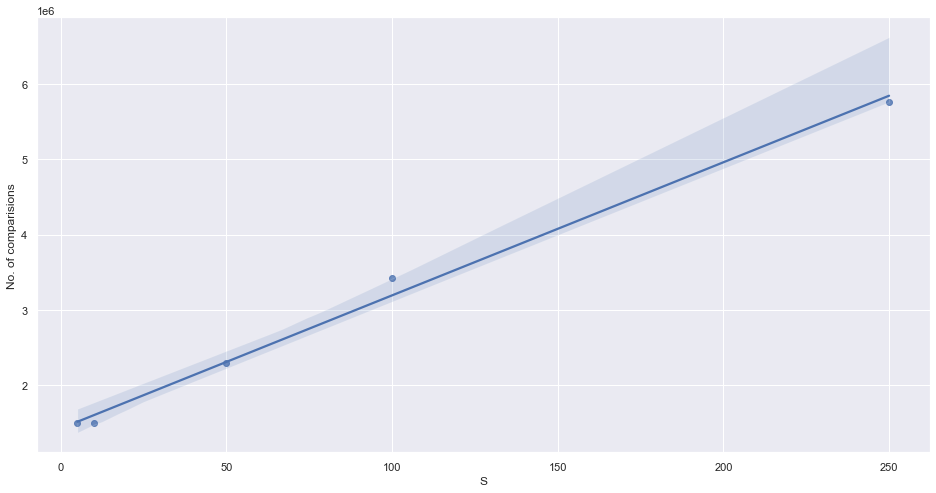

In [87]:
f = plt.figure(figsize=(16, 8))
sb.regplot(x=graph4["S"], y=graph4["No. of comparisions"])

### Table & graph for fixed N (1,000,000)

In [88]:
graph5 = pd.DataFrame(compArr[4], S)
graph5.reset_index(inplace=True)
graph5.rename({'index': 'S', 0: 'No. of comparisions'}, axis=1, inplace=True)
graph5

,S,No. of comparisions
0,5,18259716
1,10,18420599
2,50,22314662
3,100,28963233
4,250,72759131


<AxesSubplot:xlabel='S', ylabel='No. of comparisions'>

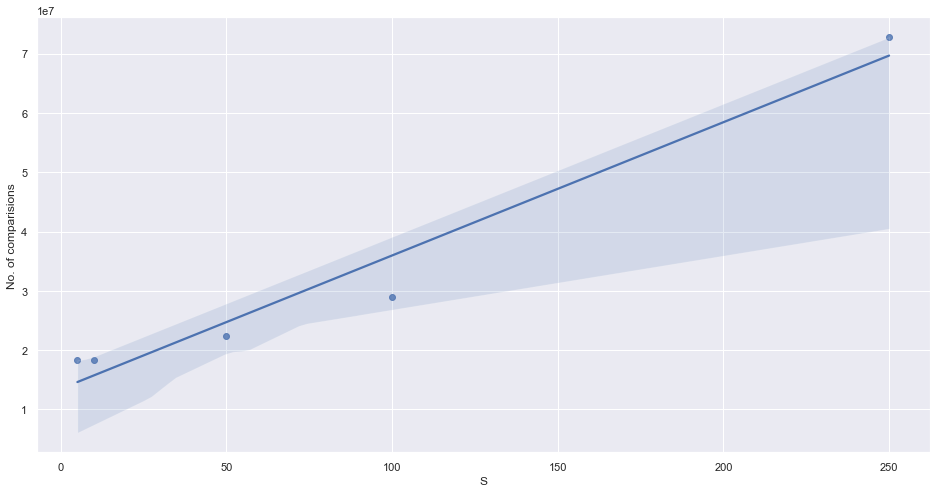

In [89]:
f = plt.figure(figsize=(16, 8))
sb.regplot(x=graph5["S"], y=graph5["No. of comparisions"])

### Table & graph for fixed N (10,000,000)

In [90]:
graph6 = pd.DataFrame(compArr[5], S)
graph6.reset_index(inplace=True)
graph6.rename({'index': 'S', 0: 'No. of comparisions'}, axis=1, inplace=True)
graph6

,S,No. of comparisions
0,5,215797459
1,10,219436087
2,50,272357750
3,100,357952841
4,250,538810930


<AxesSubplot:xlabel='S', ylabel='No. of comparisions'>

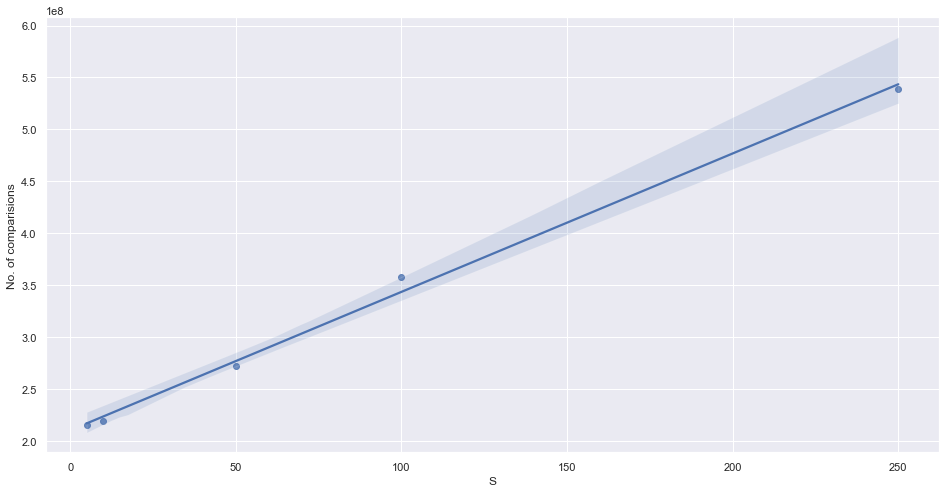

In [91]:
f = plt.figure(figsize=(16, 8))
sb.regplot(x=graph6["S"], y=graph6["No. of comparisions"])

In [ ]:
def mergesort(array):
    global comparisions 
    size  = 1
    if (len(array) <= size) :
        return array

    else :
        x = len(array)
        mid = math.ceil(x / 2)
        array1 = array[:mid]
        array2 = array[mid:]
        array1 = ultimatemergesort(array1, size)
        array2 = ultimatemergesort(array2, size)
        temparray = []
        x = 0
        y = 0
        len1 = len(array1)
        len2 = len(array2)

        while (x < len1 and y < len2):
            if (array1[x] <= array2[y]):
                temparray.append(array1[x])
                comparisions +=1
                x += 1
            else:
                temparray.append(array2[y])
                comparisions +=1
                y += 1


        while (x < len1):
            temparray.append(array1[x])
            comparisions +=1
            x += 1

        while (y < len2):
            temparray.append(array2[y])
            comparisions +=1
            y += 1


        return temparray
    